The purpose of this exercise is to analyze the nutrition dataset and generate insights. We will follow the following steps for the same:

1. Download the data from http://ashleyw.co.uk/files/foods-2011-10-03.json.zip This dataset is a compilation of data provided by the US department of Agriculture. The data set contains data for 6,636 unique foods and 94 unique nutrients (with an average of 56.5 nutrients per food)
2. Use the built in python json module to load the food data into a python list
3. Once you load the data, you will have a list of 6636 python dictionaries, each containing nutritional information for a different food item. Each dictionary will have the following keys:
    + portions
    + description
    + tags
    + nutrients
    + group
    + id
    + manufacture
4. create a DataFrame of meta_data using the description, group, id, and manufacturer items in each dictionary.
5. Loop over db and construct a list of DataFrames containing the nutritional information for each record in db. Make sure to add a column to each of these DataFrames that contains the unique food id (id key in the dictionary)
6. Use the pandas combining techniques to create a nutrients DataFrame. After you have done this drop duplicate entries in this DataFrame. 
7. Use the rename method to make sure that the description and group columns are un-ambiguous for both the meta_data DataFrame and the nutrients DataFrame (These column names are duplicated because every food has a description and group and each nutrient also has those identifiers).
8. Use the data combining routines to come up with a foods DataFrame containing all the meta_data and nutritional information. Make sure to do an outer style merge on the correct columns.
9. Using the foods DataFrame, compute the following things:
    + The food item with the highest content of each nutrient.
    + A function that accepts a nutrient name and a quantile value and generates a horizontal bar plot of the amount of that nutrient in each food group. Provide a plot title. HINT: You will need to use the quantile and sort (or order ) methods in order for this to work.

In [1]:
# Change directory to access data
%cd ~/Documents/DSE/dmysoren/DSE200/data

/Users/Deepthi/Documents/DSE/dmysoren/DSE200/data


In [9]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
## Use the built in python json module to load the food data into a python list

import json 
db = json.load(open('foods-2011-10-03.json'))

In [3]:
## Now, create a DataFrame of meta_data using the description, group, id, and manufacturer items in each dictionary.
import pandas as pd

col_name = ['description', 'group', 'id', 'manufacturer']
meta_data = pd.DataFrame(db, columns=col_name)

meta_data.head(5)


,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [4]:
## Loop over db and construct a list of DataFrames containing the nutritional information for each record in db. 
## Make sure to add a column to each of these DataFrames that contains the unique food id (id key in the dictionary)


get_list = []

for rec in db:
    temp = pd.DataFrame(rec['nutrients'])
    temp['id'] = rec['id']
    get_list.append(temp)

# Print sample data
get_list[1]

,description,group,units,value,id
0,Protein,Composition,g,24.900,1009
1,Total lipid (fat),Composition,g,33.140,1009
2,"Carbohydrate, by difference",Composition,g,1.280,1009
3,Ash,Other,g,3.930,1009
4,Energy,Energy,kcal,403.000,1009
5,Sucrose,Sugars,g,0.240,1009
6,Lactose,Sugars,g,0.230,1009
7,Maltose,Sugars,g,0.150,1009
8,"Alcohol, ethyl",Other,g,0.000,1009
9,Water,Composition,g,36.750,1009


In [5]:
## Finally, use the pandas combining techniques to create a nutrients DataFrame. 
## After you have done this drop duplicate entries in this DataFrame. 


## Using 'concat' to create nutrients DataFrame
nutrients=pd.concat(get_list)

## Drop duplicate entries
nutrients.drop_duplicates(inplace = True)


## Use the rename method to make sure that the description and group columns are un-ambiguous for both  
## the meta_data DataFrame and the nutrients DataFrame (These column names are duplicated because every 
## food has a description and group and each nutrient also has those identifiers).

# Rename columns to avoide ambiguity
meta_data.rename(columns = {'description':'food_description'}, inplace = True)
meta_data.rename(columns = {'group':'food_group'}, inplace = True)

print "Sample of meta_data dataframe: \n"
print meta_data.head(5)
print '\n'

nutrients.rename(columns = {'description':'comp_description'}, inplace = True)
nutrients.rename(columns = {'group':'comp_group'}, inplace = True)

print "Sample of nutrients dataframe: \n"
print nutrients.head(5)

Sample of meta_data dataframe: 

                     food_description              food_group    id  \
0                     Cheese, caraway  Dairy and Egg Products  1008   
1                     Cheese, cheddar  Dairy and Egg Products  1009   
2                        Cheese, edam  Dairy and Egg Products  1018   
3                        Cheese, feta  Dairy and Egg Products  1019   
4  Cheese, mozzarella, part skim milk  Dairy and Egg Products  1028   

  manufacturer  
0               
1               
2               
3               
4               


Sample of nutrients dataframe: 

              comp_description   comp_group units   value    id
0                      Protein  Composition     g   25.18  1008
1            Total lipid (fat)  Composition     g   29.20  1008
2  Carbohydrate, by difference  Composition     g    3.06  1008
3                          Ash        Other     g    3.28  1008
4                       Energy       Energy  kcal  376.00  1008


In [6]:
#Finally, use the data combining routines to come up with a foods DataFrame containing all the meta_data and nutritional 
#information. Make sure to do an outer style merge on the correct columns.

foods = pd.merge(nutrients, meta_data, left_on='id', right_on='id', how='outer')


# Print sample food data
foods.head(5)

,comp_description,comp_group,units,value,id,food_description,food_group,manufacturer
0,Protein,Composition,g,25.18,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.20,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.06,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.28,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.00,1008,"Cheese, caraway",Dairy and Egg Products,


In [7]:
# Using the foods DataFrame you have been building, compute the following things:
# 1. The food item with the highest content of each nutrient.

high_nutr = foods.sort('value',ascending=False).groupby('comp_description', as_index = False).first()
# Note: The output provides one example of a product with max value in case of multiple items with same value.

# If there is a use case to have all the food items with equal values, we can use tranform and output all possible outputs

# Displaying 15 rows only just to keep the notebook smaller
high_nutr.reset_index().head(15)

,index,comp_description,comp_group,units,value,id,food_description,food_group,manufacturer
0,0,Adjusted Protein,Composition,g,12.900,19078,"Baking chocolate, unsweetened, squares",Sweets,
1,1,Alanine,Amino Acids,g,8.009,19177,"Gelatins, dry powder, unsweetened",Sweets,
2,2,"Alcohol, ethyl",Other,g,42.500,14533,"Alcoholic beverage, distilled, all (gin, rum, ...",Beverages,
3,3,Arginine,Amino Acids,g,7.436,12033,"Seeds, sesame flour, low-fat",Nut and Seed Products,
4,4,Ash,Other,g,72.500,19225,"Desserts, rennin, tablets, unsweetened",Sweets,
5,5,Aspartic acid,Amino Acids,g,10.203,16422,"Soy protein isolate, potassium type",Legumes and Legume Products,
6,6,Beta-sitosterol,Other,mg,426.000,4678,"Oil, vegetable, Natreon canola, high stability...",Fats and Oils,"Dow AgroSciences, LLC"
7,7,Betaine,Vitamins,mg,630.400,20035,"Quinoa, uncooked",Cereal Grains and Pasta,
8,8,Caffeine,Other,mg,3680.000,14366,"Tea, instant, unsweetened, powder",Beverages,
9,9,"Calcium, Ca",Elements,mg,7364.000,18370,"Leavening agents, baking powder, double-acting...",Baked Products,


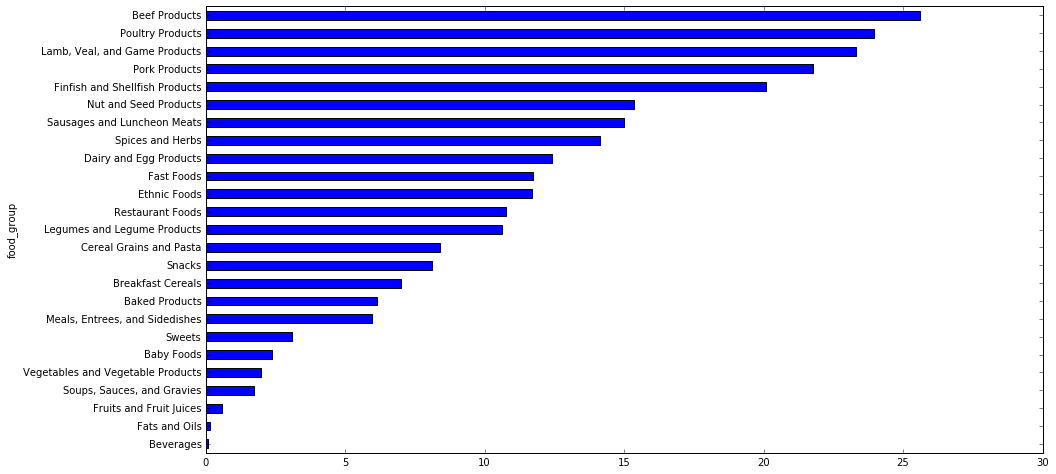

In [10]:
# 2. A function that accepts a nutrient name and a quantile value and generates 
# a horizontal bar plot of the amount of that nutrient in each food group. 
# Provide a plot title.

def nut_quant(nut,quant):
    quant = foods.groupby(['comp_description', 'food_group'])['value'].quantile(quant)
    quant[nut].order().plot(kind='barh', figsize = (15,8))


# Input a nutrient Eg: Water, Protein, Vitamin D and a quantile - a number less than 1
nut_quant('Protein',0.5)